## Importando os módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from polynomial_regression import *
from min_max import *
from train_test_split import *

## Preparando os dados

In [2]:
data = pd.read_csv('../california.csv', header=None)

X = data.iloc[:, :-1].values
y = (data.iloc[:, -1].values).reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Normalizando

In [3]:
mm = MinMax()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [4]:
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

## Treinando o modelo

In [5]:
models = list()
for i in range(1, 14):
    models.append(PolynomialRegression())
    models[i - 1].fit(X_train, y_train, i)


## Resultados

### RMSE

In [6]:
rmses = [list(), list()]
for i in range(13):
    rmses[0].append(models[i].get_rmse(X_train, y_train))
    rmses[1].append(models[i].get_rmse(X_test, y_test))


/tmp/ipykernel_11763/114948522.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


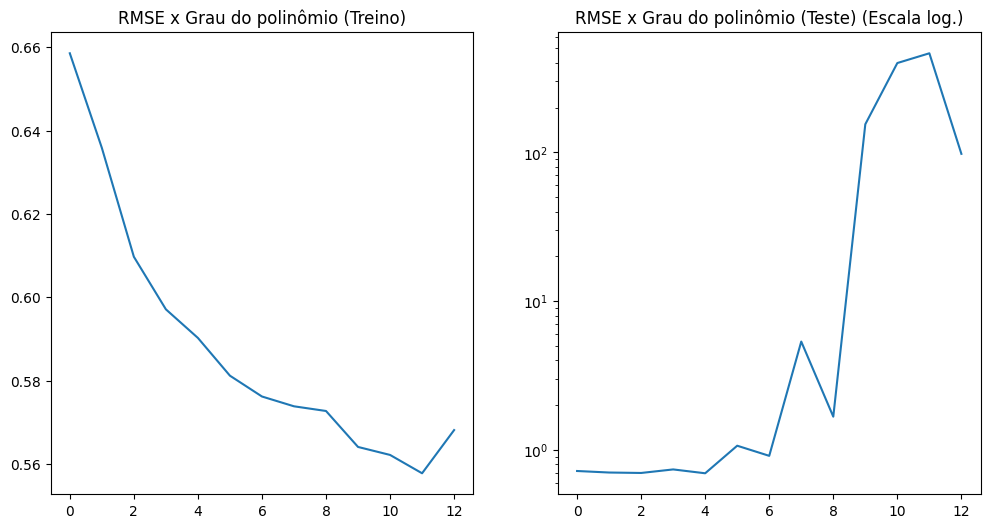

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize=(12, 6))
ax1.set_title('RMSE x Grau do polinômio (Treino)')
ax2.set_title('RMSE x Grau do polinômio (Teste) (Escala log.)')
ax2.set_yscale('log')
ax1.plot(range(len(rmses[0])), rmses[0])
ax2.plot(range(len(rmses[1])), rmses[1])
fig.show()

## Com regularização

In [8]:
models = list()
for i in range(1, 14):
    models.append(PolynomialRegression())
    models[i - 1].fit(X_train, y_train, i, regularize = True)

In [9]:
rmses = [list(), list()]
for i in range(13):
    rmses[0].append(models[i].get_rmse(X_train, y_train))
    rmses[1].append(models[i].get_rmse(X_test, y_test))

/tmp/ipykernel_11763/114948522.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


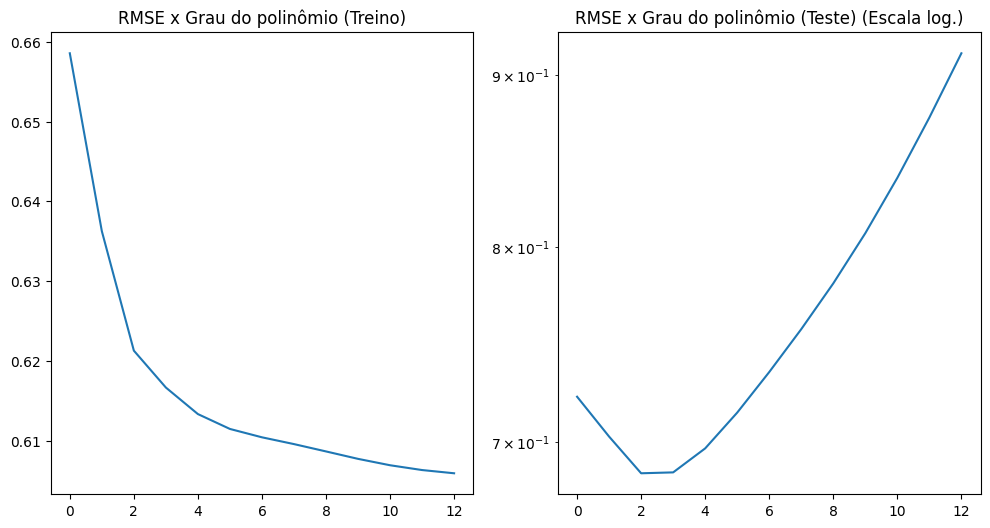

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize=(12, 6))
ax1.set_title('RMSE x Grau do polinômio (Treino)')
ax2.set_title('RMSE x Grau do polinômio (Teste) (Escala log.)')
ax2.set_yscale('log')
ax1.plot(range(len(rmses[0])), rmses[0])
ax2.plot(range(len(rmses[1])), rmses[1])
fig.show()